In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn
from sklearn.preprocessing import scale
from sklearn import datasets

>**StandardScaler:** StandardScaler use to Standardize the data/ for standardization.. 'Transofrm the data in such a manner that have mean 0 and standard deviation 1...'
    
>**Normalization:** Normalization use for transform the data between zero and one

## Unsupervised Learning
1. KMeans()
2. StandardScaler()
3. PCA

>Fit( ) learn the transformation from the given data\
>Transform( ) applies and learn transformation

In [44]:
df = pd.read_csv('iris-dataset.csv')

In [45]:
iris = datasets.load_iris()

In [46]:
x = iris.data[:]
y = iris.target

cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [67]:
df_n = pd.DataFrame(x, columns=cols)

In [68]:
df_n

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:
cols_y = ['species']
target = pd.DataFrame(y, columns = cols_y)

>**KMeans**

In [50]:
kmeans =  KMeans(n_clusters = 3)

In [51]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [52]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [53]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [54]:
centroid_x = centroids[:,0]
centroid_y = centroids[:,1]

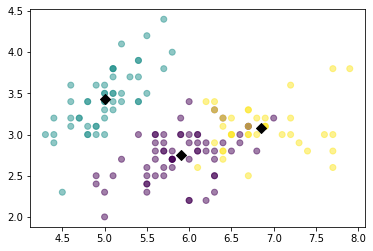

In [55]:
plt.scatter(x = df.sepal_length, y = df.sepal_width, c=labels, alpha=0.5)

plt.scatter(centroid_x, centroid_y, marker='D', s=50, c='Black')
plt.show();

In [56]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [57]:
target = target.replace(0, 'setosa')
target = target.replace(1, 'versicolar')
target = target.replace(2, 'virginica')

In [58]:
target['nmbr'] = labels

In [59]:
target.head()

,species,nmbr
0,setosa,1
1,setosa,1
2,setosa,1
3,setosa,1
4,setosa,1


In [60]:
pd.crosstab(target['nmbr'], target['species'])

species,setosa,versicolar,virginica
nmbr,,,
0,0,48,14
1,50,0,0
2,0,2,36


In [61]:
kmeans.inertia_

78.851441426146

[681.3705999999996, 152.34795176035797, 78.851441426146, 57.22847321428572, 46.47223015873018]


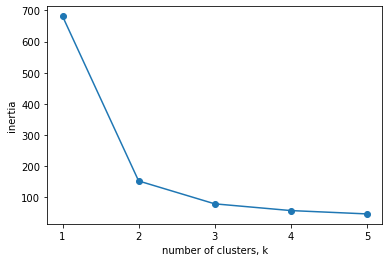

In [62]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(x)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
print(inertias)
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

>**StandardScaler**

In [63]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(x)

# Calculate the cluster labels: labels
labels = pipeline.predict(x)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species':target['species']})

# Create crosstab: ct
ct = pd.crosstab(df.labels, df.species)

# Display ct
ct


species,setosa,versicolar,virginica
labels,,,
0,50,0,0
1,0,11,36
2,0,39,14


## T-SNE

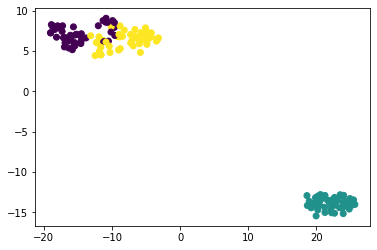

In [24]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(x)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=labels)
plt.show()

### Dimension Reduction

Dimension Reduction Find pattern in data and uses these patterns to reexpress it in more compresses form
remove less-information 'Noise' features from the data.. which cause problems in prediction. e.g Classification and regression

**Principle Component Analysis** (PCA): \
PCA is often used before supervised learning to improve model performance and generalization. It can also be useful for unsupervised learning.\
perform Dimension Reduction in two steps
1. **Decorrelation** (Does not change the dimension of the data) 
  * rotate the data samples to be aligned with axis
  * shift the samples so they have mean zero
2. 

------


>**PCA VS normal**

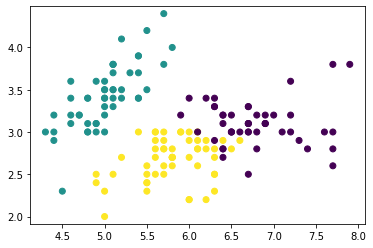

-0.11756978413300204


In [42]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = df.sepal_length

# Assign the 1st column of grains: length
length = df.sepal_width

# Scatter plot width vs length
plt.scatter(width, length, c=labels)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

------

**PCA**

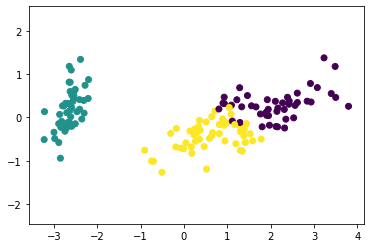

3.8163916471489756e-17


In [36]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(df)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys, c=labels)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)